## 나이브 베이즈
#### 필요한 패키지를 불러온다:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from scipy.stats import itemfreq

#### 데이터를 불러온다:

In [2]:
os.chdir(r"D:\python_ML\python_ml_basic\data")

In [3]:
# df = pd.read_csv('data_iris.csv', header='infer',encoding='ISO-8859-1')
df = pd.read_csv('data_iris.csv', header='infer',encoding='latin1')

In [4]:
df.shape

(150, 5)

In [5]:
# 질적 데이터 4개, 양적 데이터 1개
# 꽃받침 : sepal, 꽃잎 : petal
df.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail(5)

In [6]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
X=np.array(df.drop(columns='Species'))
Y=np.array(df.Species)

#### 간단한 시각화:

D:\python_ML\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


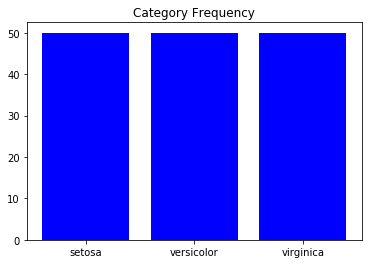

array([['setosa', 50],
       ['versicolor', 50],
       ['virginica', 50]], dtype=object)

In [8]:
# 각 꽃의 종류별 카운트
table = np.unique(Y, return_counts=True)
plt.bar(table[:,0],table[:,1],color = 'blue')
plt.title('Category Frequency')
plt.show()
table

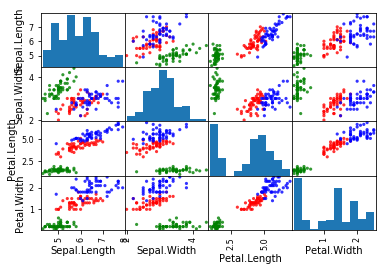

In [16]:
# 꽃의 종류를 색상별로 구분하고, 각 질적데이터(꽃받침, 꽃잎의 갯수)의 상관도를 분석해보자.
# scatter matrix는 개별 변수의 분포와 함께 변수간 상관관계를 한눈에 볼 수 있다.
mycolors = {'setosa':'green', 'virginica':'blue', 'versicolor':'red'}
# alpha : 선명도, s : marker size
pd.plotting.scatter_matrix(df, c=np.vectorize(mycolors.get)(Y),alpha=0.8,marker='o',s=10);

#### 나이브베이즈 적용:

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [ ]:
GNB = GaussianNB()
GNB.fit(X_train,Y_train)
Y_pred_test = GNB.predict(X_test)

In [ ]:
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

In [ ]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_test)
print('Accuracy    = ' + str(np.round(accuracy,2)))